<a href="https://colab.research.google.com/github/elena877/www/blob/main/Galactic_bulge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.constants as ac # import a Python package to call the value of certains constants.
import astropy.units as u # import a Python package to call certain units such as the mass of the Sun.
import numpy as np #Import numpy package which allows us to conduct mathematical operations for the defined quantities.
import matplotlib.pyplot as plt #Import matplotlib package which allows us to plot the data.

In [ ]:
def calculatingOrbitalVelocity (M, R): # Function that takes the mass and orbital radius and gives orbital velocity whenever called
    """
    This is a function that calculates the orbital velocity
    Input:
    M, the mass of the object
    R, the orbital radius of the object
    Output:
    orbitalVelocity, the orbital velocity of the object
    """
    orbitalVelocity = np.sqrt(ac.G * M / R)
    return orbitalVelocity

In [ ]:
SgrA_M = 4.297 * 10**6 * u.solMass # Mass of the black hole in solar masses
MilkyWay_R = np.arange(1, 31) * u.kiloparsec # This is an array of milky way radii; at different lengths there will be different velocities
MilkyWay_Vel = calculatingOrbitalVelocity(SgrA_M, MilkyWay_R) # Velocities for each different radii in the previous array
print(MilkyWay_Vel.to(u.km/u.s)) # print to check

[4.29895819 3.03982249 2.48200467 2.14947909 1.92255255 1.75504233
 1.62485347 1.51991124 1.43298606 1.35944994 1.29618466 1.24100233
 1.19231648 1.1489449  1.10998623 1.07473955 1.04265051 1.01327416
 0.98624865 0.96127627 0.93810959 0.91654097 0.89639475 0.87752117
 0.85979164 0.84309507 0.82733489 0.81242673 0.79829649 0.78487879] km / s


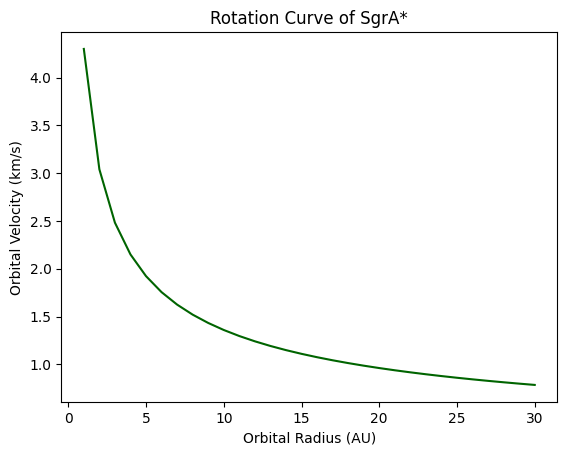

In [ ]:
# Create the plot
plt.plot(MilkyWay_R, MilkyWay_Vel.to(u.km/u.s), color='darkgreen')


plt.xlabel("Orbital Radius (AU)") # label the x and y axis, title
plt.ylabel("Orbital Velocity (km/s)")
plt.title("Rotation Curve of SgrA*")

# Display the plot
plt.show()

In [ ]:
M_bulge = 1.5*10**10 * u.solMass # mass of bulge in solar masses
R_arr = np.arange(1, 31) * u.kpc # Define a range of orbital radius in kilo parsec
v_arr = calculatingOrbitalVelocity(M_bulge, R_arr) # name the orbital velocities at the previously defined radii
print(v_arr.to(u.km/u.s)) # Print out to check!

[253.99558864 179.60200312 146.64442148 126.99779432 113.59028044
 103.69326485  96.00130881  89.80100156  84.66519621  80.32045757
  76.58255145  73.32221074  70.44570143  67.88317646  65.58137899
  63.49889716  61.60297885  59.86733437  58.27058437  56.79514022
  55.42638148  54.15204145  52.96174134  51.84663242  50.79911773
  49.81263319  48.88147383  48.0006544   47.16579673  46.3730378 ] km / s


In [ ]:
M_total = M_bulge + SgrA_M #Adding Mass of bulge to black hole mass
v_total = calculatingOrbitalVelocity(M_total, R_arr) #array of velocities at different radii
print(v_total.to(u.km/u.s)) # Print to check

[254.03196667 179.62772627 146.66542434 127.01598334 113.60654919
 103.70811612  96.01505841  89.81386314  84.67732222  80.33196132
  76.59351984  73.33271217  70.45579088  67.8928989   65.59077176
  63.50799167  61.61180182  59.87590876  58.27893006  56.80327459
  55.43431982  54.15979727  52.96932668  51.85405806  50.80639333
  49.81976751  48.88847478  48.00752921  47.17255196  46.37967949] km / s


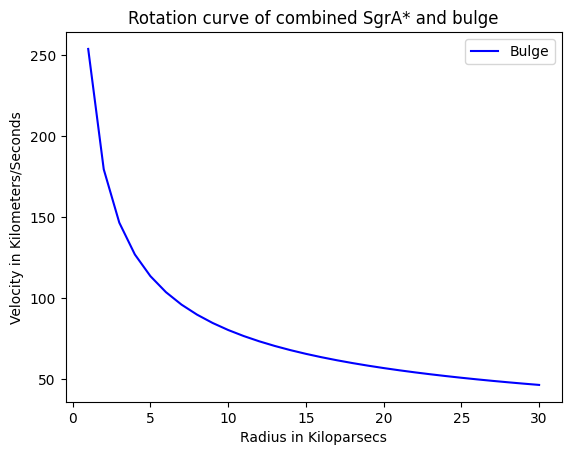

In [ ]:
# Create the plot
plt.plot(MilkyWay_R, v_total.to(u.km/u.s), label= "Bulge",color='blue')


plt.xlabel("Radius in Kiloparsecs")
plt.ylabel("Velocity in Kilometers/Seconds")
plt.title("Rotation curve of combined SgrA* and bulge")
plt.legend()

# Display the plot
plt.show()




In [ ]:
M_disk = 1 * 10**11 * u.solMass #Defines total mass of disk
R_disk = 10 * u.kpc #Defines outer egde of disk
D_disk = M_disk / ( np.pi * (R_disk**2) ) # Density is solarmasses per square kiloparsec

M_disk_enclosed = np.zeros(len (MilkyWay_R)) * u.solMass # Array of zeroes for enclosed mass of disk so that later we have spaces to put values
print (M_disk_enclosed)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] solMass


In [ ]:
def CalculatingEnclosedMassForDisk (R, D): # R and D are local variables, meaning they don't need to be specifically labelled "R_disk" and "D_disk"
  """
  Calculate enclosed mass of just the disk
  Input: Orbital radius, density
  Output: Enclosed mass of the disk
  """
  if R < 10 * u.kpc:  # If the R is less than 10 kiloparsecs, then M will be dependent on R
      M = np.pi * R**2 * D
      return (M)
  else:
      M = 1 * 10**11 * u.solMass # If R is not less than 10 Kiloparsecs, then M will be at its maximum, 10^11 solar masses
      return (M)

print (CalculatingEnclosedMassForDisk (10*u.kpc, 318 * 1e6 * u.solMass/u.kpc**2)) #Print to check


100000000000.0 solMass


In [ ]:
M_diskEnclosed = np.zeros(len(MilkyWay_R)) * u.solMass

for i in np.arange(len(MilkyWay_R)): # now we're putting in values of enclosed mass (based on the varying radii and the density of the disk) into the array of zeroes.
    M_diskEnclosed[i] = CalculatingEnclosedMassForDisk(MilkyWay_R[i], D_disk)
print(M_diskEnclosed) # Print to check!

[1.0e+09 4.0e+09 9.0e+09 1.6e+10 2.5e+10 3.6e+10 4.9e+10 6.4e+10 8.1e+10
 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11
 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11 1.0e+11
 1.0e+11 1.0e+11 1.0e+11] solMass


In [ ]:
M_total = M_bulge + SgrA_M + M_diskEnclosed #Adding the Enclosed mass of the disk to the total mass of the galaxy
v_total = calculatingOrbitalVelocity(M_total, R_arr) # calculating total velocity with new total mass
print(v_total.to(u.km/u.s)) #Print out array of new total velocities

[262.36073899 202.15824145 185.50875588 182.5834853  185.50211419
 191.20898768 198.30610765 206.09189254 214.19268038 222.40143145
 212.05144468 203.02380137 195.05895896 187.96351604 181.59000837
 175.82376956 170.57411139 165.76823967 161.34695651 157.26156032
 153.47156819 149.94301449 146.64716115 143.55950669 140.65901565
 137.92751261 135.34920092 132.91027681 130.59861739 128.40352631] km / s


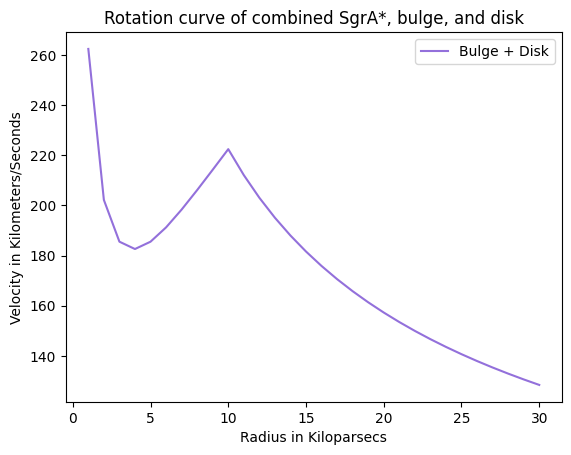

In [ ]:
# Create the plot
plt.plot(MilkyWay_R, v_total.to(u.km/u.s), label= "Bulge + Disk", color='mediumpurple')


plt.xlabel("Radius in Kiloparsecs")
plt.ylabel("Velocity in Kilometers/Seconds")
plt.title("Rotation curve of combined SgrA*, bulge, and disk")
plt.legend()

# Display the plot
plt.show()


In [ ]:
M_halo = 1 * 10**12 * u.solMass # total mass of halo
R_halo = 50 * u.kpc #
D_halo = M_halo / ( 4/3 * np.pi * (R_halo**3) )
print(D_halo) #this is 191 * 1e4

M_HaloEnclosed = np.zeros(len (MilkyWay_R)) * u.solMass # making an array of zeros; similar to the disk
print (M_HaloEnclosed) # print to check

1909859.3171027442 solMass / kpc3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] solMass


In [ ]:
def CalculatingEnclosedMassForHalo (R,D): # function for the enclosed mass of the halo dependent on the radius of the halo modeled as a sphere and its density
  """
  Calculate enclosed mass of just the halo
  Input: Orbital radius, density
  Output: Enclosed mass of the halo
  """
  M = (4/3) * np.pi * R**3 * D
  return (M) # calculate the mass based on the input

  print(CalculatingEnclosedMassForHalo(( 50* u.kpc ) ,(191 *1e4 * u.solMass/u.kpc**3))) # print to check

In [ ]:
M_HaloEnclosed = np.zeros(len(MilkyWay_R)) * u.solMass

for i in np.arange(len(MilkyWay_R)):
    M_HaloEnclosed[i] = CalculatingEnclosedMassForHalo(MilkyWay_R[i], D_halo) # filling in values instead of the zeros
print(M_HaloEnclosed)

[8.00000e+06 6.40000e+07 2.16000e+08 5.12000e+08 1.00000e+09 1.72800e+09
 2.74400e+09 4.09600e+09 5.83200e+09 8.00000e+09 1.06480e+10 1.38240e+10
 1.75760e+10 2.19520e+10 2.70000e+10 3.27680e+10 3.93040e+10 4.66560e+10
 5.48720e+10 6.40000e+10 7.40880e+10 8.51840e+10 9.73360e+10 1.10592e+11
 1.25000e+11 1.40608e+11 1.57464e+11 1.75616e+11 1.95112e+11 2.16000e+11] solMass


In [ ]:
print(CalculatingEnclosedMassForHalo((1 * u.kpc ) ,(1e6 * u.solMass/u.kpc**3)) ) # checking to see if the function works at different R values
print(CalculatingEnclosedMassForHalo((5 * u.kpc ) ,(1e6 * u.solMass/u.kpc**3)))


4188790.2047863905 solMass
523598775.59829885 solMass


In [ ]:
M_total = M_bulge + SgrA_M + M_diskEnclosed + M_HaloEnclosed # adding in enclosed halo mass to the total mass
v_total = calculatingOrbitalVelocity(M_total, MilkyWay_R) # calculating the new arry of velocities with the new total mass
print(v_total.to(u.km/u.s)) #print

[262.42630337 202.4983554  186.34152664 184.08488942 187.80633062
 194.42104089 202.51239938 211.36683234 220.60258095 230.00680539
 221.65085858 214.87978178 209.43456644 205.1197739  201.78350335
 199.30448192 197.5835221  196.53774917 196.09663294 196.19921921
 196.7921705  197.82835809 199.26583189 201.06705037 203.19828994
 205.62917918 208.33232036 211.28297328 214.45878452 217.83955085] km / s


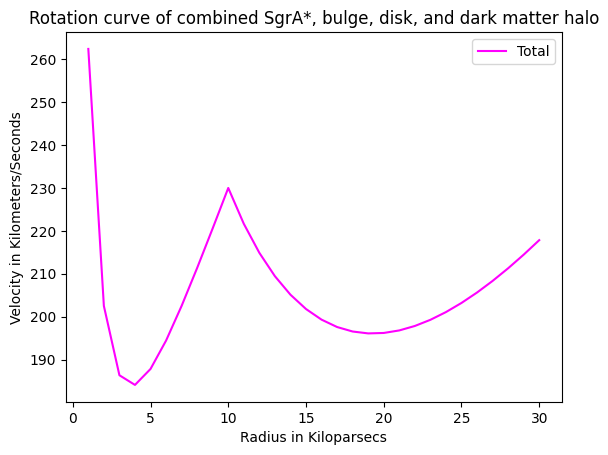

In [ ]:
# Create the plot
plt.plot(MilkyWay_R, v_total.to(u.km/u.s), label= "Total", color='fuchsia')


plt.xlabel("Radius in Kiloparsecs")
plt.ylabel("Velocity in Kilometers/Seconds")
plt.title("Rotation curve of combined SgrA*, bulge, disk, and dark matter halo")
plt.legend()

# Display the plot
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")